# Experiments on Inception algorithm

The idea of this notebook is to understand and test the Inception algorithm locally on a few samples.

In [1]:
import pandas as pd
import numpy as np
from utility_functions import log_progress

CSV_LINK = "../data/raw/RAISE_6k.csv"
IMAGE_SIZE = (700, 700)
DATASET_SIZE = 50
TRAIN_TEST_RATIO = 0.2
EPOCHS_NB = 5
BATCH_SIZE = 10
VALIDATION_RATIO = 0.1

## Pictures download and preprocessing

Here we will download some pictures and extract their label people/not people (50, in a balanced dataset).

In [2]:
import requests

First we extract from the dataframe:
- The file name
- The download link
- The people label

In [3]:
df = pd.read_csv(CSV_LINK)
df["People"] = df["Keywords"].map(lambda keywordsStr : float('people' in keywordsStr))
df = df[["File", "TIFF", "People"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   File    6000 non-null   object 
 1   TIFF    6000 non-null   object 
 2   People  6000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 140.8+ KB


Then we select the correct number of images.

In [4]:
df_not_people = df[df["People"] == 0]
df_people = df[df["People"] == 1]
df_final = pd.concat([df_not_people.iloc[:DATASET_SIZE//2], df_people.iloc[:DATASET_SIZE//2]])
# We must shuffle and reset the index
df_final = df_final.sample(frac=1).reset_index(drop=True)
df_final

,File,TIFF,People
0,r03995a8ct,http://193.205.194.113/RAISE/TIFF/r03995a8ct.TIF,1.0
1,r0141f0c9t,http://193.205.194.113/RAISE/TIFF/r0141f0c9t.TIF,1.0
2,r00de2590t,http://193.205.194.113/RAISE/TIFF/r00de2590t.TIF,0.0
3,r006b0e4bt,http://193.205.194.113/RAISE/TIFF/r006b0e4bt.TIF,0.0
4,r00617aa1t,http://193.205.194.113/RAISE/TIFF/r00617aa1t.TIF,0.0
5,r0428df0ct,http://193.205.194.113/RAISE/TIFF/r0428df0ct.TIF,1.0
6,r01b3f004t,http://193.205.194.113/RAISE/TIFF/r01b3f004t.TIF,1.0
7,r01170470t,http://193.205.194.113/RAISE/TIFF/r01170470t.TIF,0.0
8,r000da54ft,http://193.205.194.113/RAISE/TIFF/r000da54ft.TIF,0.0
9,r0207a52ct,http://193.205.194.113/RAISE/TIFF/r0207a52ct.TIF,1.0


Now we can download the images

In [5]:
def get_file_path(file_name):
    return "../data/raw/pictures/image_" + file_name + ".tif"

def download_images():
    for index, row in log_progress(df_final.iterrows(), size=df_final.shape[0]):
        if not os.path.isfile(get_file_path(row["File"])):
            response = requests.get(row["TIFF"])
            file = open(get_file_path(row["File"]), 'wb')
            file.write(response.content)
            file.close()

download_images()

## Preprocessing

The goal of this part is to preprocess data that we will use in Keras.

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

Inception V3 takes in images of size we want.

It also provides a function to preprocess images (by scaling pixel values between -1 and 1).

In [7]:
images = []
for index, row in log_progress(df_final.iterrows(), size=DATASET_SIZE):
    img = image.load_img(get_file_path(row["File"]), target_size=IMAGE_SIZE)
    images.append(image.img_to_array(img))
preprocessed_images = preprocess_input(np.array(images))
print(preprocessed_images.shape)

(50, 700, 700, 3)


In [8]:
labels = df_final["People"].to_numpy()
print(labels)

[1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1.]


We can create the training and testing datasets

In [9]:
X_train, X_test, y_train, y_test = list(map(lambda l : np.array(l), train_test_split(images, labels, test_size=0.2)))

## Build model

Here we will import Inception V3 and add custom layers on top

In [10]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [11]:
import sys

First we import InceptionV3 without its top layer.

In [12]:
inception_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
print("Model structure: ", inception_model.summary())

_____________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, 42, 42, 192)  147456      average_pooling2d_6[0][0]        
__________________________________________________________________________________________________
batch_normalization_60 (BatchNo (None, 42, 42, 192)  576         conv2d_60[0][0]                  
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 42, 42, 192)  576         conv2d_63[0][0]                  
__________________________________________________________________________________________________
batch_normalization_68 (BatchNo (None, 42, 42, 192)  576         conv2d_68[0][0]                  
__________________________________________________________________________________________________
batch_normalization_69 (BatchNo (None, 42, 42, 192)  576         conv2d_69[0][0]                  
_______________

In [13]:
# Nb of layers
print("Nb of layers: ", len(inception_model.layers), "\n")

# Entry layer
print("Entry layer: ", inception_model.layers[0], " with ", inception_model.layers[0].input_shape, " input shape.\n")

# Last layers
print("Before last layer: ", inception_model.layers[-2], " with ", inception_model.layers[-2].output_shape, " output shape.")
print("Last layer: ", inception_model.layers[-1], " with ", inception_model.layers[-1].output_shape, " output shape.")

Nb of layers:  311 

Entry layer:  <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x1a4a125610>  with  [(None, 700, 700, 3)]  input shape.

Before last layer:  <tensorflow.python.keras.layers.core.Activation object at 0x1a80673c10>  with  (None, 20, 20, 192)  output shape.
Last layer:  <tensorflow.python.keras.layers.merge.Concatenate object at 0x1a80673f90>  with  (None, 20, 20, 2048)  output shape.


Then we add a dense layert we will train to predict id there are people in images.

We put all Inception layers as non trainable because we don't want to update its weights.

In [14]:
flat1 = layers.Flatten()(inception_model.layers[-1].output)
output = layers.Dense(1, activation='sigmoid')(flat1)
model = Model(inputs=inception_model.inputs, outputs=output)

# We only want to train the last layer
for layer in model.layers[:-2]:
	layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Training

The goal of this part is to try to use Inception V3.

In [15]:
# Nb of layers
print("Nb of layers: ", len(model.layers), "\n")

# Entry layer
print("Entry layer: ", model.layers[0], " with ", model.layers[0].input_shape, " input shape.\n")

# Last layers
print("Last layer from Inception: ", model.layers[-3], " with ", model.layers[-3].output_shape, " output shape.")
print("First additional layer: ", model.layers[-2], " with ", model.layers[-2].output_shape, " output shape.")
print("Second additional layer: ", model.layers[-1], " with ", model.layers[-1].output_shape, " output shape.")

Nb of layers:  313 

Entry layer:  <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x1a4a125610>  with  [(None, 700, 700, 3)]  input shape.

Last layer from Inception:  <tensorflow.python.keras.layers.merge.Concatenate object at 0x1a80673f90>  with  (None, 20, 20, 2048)  output shape.
First additional layer:  <tensorflow.python.keras.layers.core.Flatten object at 0x1a85bb3150>  with  (None, 819200)  output shape.
Second additional layer:  <tensorflow.python.keras.layers.core.Dense object at 0x120b08c10>  with  (None, 1)  output shape.


We create the train/test datasets and we train our model.

In [16]:
model.fit(X_train, y_train,
              epochs=EPOCHS_NB,
              batch_size=BATCH_SIZE,
              validation_split=VALIDATION_RATIO)


Train on 36 samples, validate on 4 samples
Epoch 1/5
36/36 [==============================] - 80s 2s/sample - loss: 17.8329 - acc: 0.5556 - val_loss: 441.3585 - val_acc: 0.5000
Epoch 2/5
36/36 [==============================] - 54s 2s/sample - loss: 5.9985 - acc: 0.8056 - val_loss: 263.8618 - val_acc: 0.5000
Epoch 3/5
36/36 [==============================] - 52s 1s/sample - loss: 0.8529 - acc: 0.9722 - val_loss: 6.1580e-26 - val_acc: 1.0000
Epoch 4/5
36/36 [==============================] - 53s 1s/sample - loss: 0.7074 - acc: 0.9722 - val_loss: 24.1040 - val_acc: 0.7500
Epoch 5/5
36/36 [==============================] - 54s 1s/sample - loss: 2.3649e-16 - acc: 1.0000 - val_loss: 146.8325 - val_acc: 0.5000


In [17]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("Test loss, test acc:", results)


Evaluate on test data
10/10 [==============================] - 14s 1s/sample - loss: 278.7574 - acc: 0.5000
Test loss, test acc: [278.7574462890625, 0.5]


We don't have enough data to get useful results here (overfitting).

## Inception with built-in features

Inception has built-in features, we can see what it's capable of.

In [18]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

Let's build inception with top

In [19]:
inception_model_full = InceptionV3(weights="imagenet", include_top=True)
print("Model structure: ", inception_model_full.summary())

_____________________________________________________________________________________________
batch_normalization_157 (BatchN (None, 17, 17, 192)  576         conv2d_157[0][0]                 
__________________________________________________________________________________________________
batch_normalization_162 (BatchN (None, 17, 17, 192)  576         conv2d_162[0][0]                 
__________________________________________________________________________________________________
batch_normalization_163 (BatchN (None, 17, 17, 192)  576         conv2d_163[0][0]                 
__________________________________________________________________________________________________
activation_154 (Activation)     (None, 17, 17, 192)  0           batch_normalization_154[0][0]    
__________________________________________________________________________________________________
activation_157 (Activation)     (None, 17, 17, 192)  0           batch_normalization_157[0][0]    
_______________

In [20]:
# Nb of layers
print("Nb of layers: ", len(inception_model_full.layers), "\n")

# Entry layer
print("Entry layer: ", inception_model_full.layers[0], " with ", inception_model_full.layers[0].input_shape, " input shape.\n")

# Last layers
print("Before last layer: ", inception_model_full.layers[-2], " with ", inception_model_full.layers[-2].output_shape, " output shape.")
print("Last layer: ", inception_model_full.layers[-1], " with ", inception_model_full.layers[-1].output_shape, " output shape.")

Nb of layers:  313 

Entry layer:  <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x1b74d61b50>  with  [(None, 299, 299, 3)]  input shape.

Before last layer:  <tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x1b77f4da90>  with  (None, 2048)  output shape.
Last layer:  <tensorflow.python.keras.layers.core.Dense object at 0x1b77f48a50>  with  (None, 1000)  output shape.


We can see what Inception is capable of:

[[('n03617480', 'kimono', 0.118979655), ('n02879718', 'bow', 0.10908304), ('n04192698', 'shield', 0.07558577)]]
[[('n04296562', 'stage', 0.9973564), ('n04286575', 'spotlight', 0.0015096968), ('n03691459', 'loudspeaker', 0.00038497135)]]
[[('n03877845', 'palace', 0.6833546), ('n04486054', 'triumphal_arch', 0.041099835), ('n04423845', 'thimble', 0.034796134)]]
[[('n03903868', 'pedestal', 0.91168493), ('n02808304', 'bath_towel', 0.047163334), ('n04399382', 'teddy', 0.009852814)]]
[[('n03028079', 'church', 0.78083444), ('n02825657', 'bell_cote', 0.035876855), ('n03220513', 'dome', 0.013201592)]]


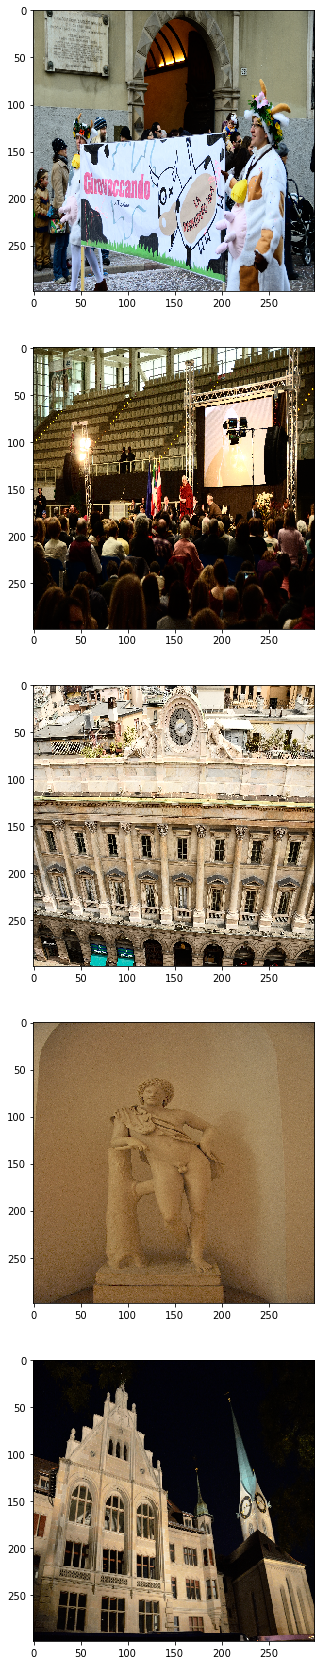

In [21]:
nb_images_to_process = 5
fig, axes = plt.subplots(nrows=nb_images_to_process, ncols=1, figsize=(30,30))
for i, row in df_final.iloc[:nb_images_to_process].iterrows():
    img = image.load_img(get_file_path(row["File"]), target_size=(299,299))
    axes[i].imshow(img)
    features = inception_model_full.predict(preprocess_input(np.expand_dims(img, axis = 0)))
    print(decode_predictions(features, top = 3))